In [2]:
% pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,9776,17-02-2012,1,1,2,6,0,5,1,2,0.28,0.2879,0.96,0.1343,1,70,71
1,9777,17-02-2012,1,1,2,7,0,5,1,2,0.28,0.2879,0.93,0.1045,4,222,226
2,9778,17-02-2012,1,1,2,8,0,5,1,2,0.26,0.3030,1.00,0.0000,4,516,520
3,9779,17-02-2012,1,1,2,9,0,5,1,2,0.26,0.3030,1.00,0.0000,8,275,283
4,9780,17-02-2012,1,1,2,10,0,5,1,1,0.34,0.3182,0.71,0.2836,13,103,116


In [6]:
train = train.drop('dteday', axis = 1)
test = test.drop('dteday', axis = 1)

In [7]:
train.head()
test.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,9776,1,1,2,6,0,5,1,2,0.28,0.2879,0.96,0.1343,1,70,71
1,9777,1,1,2,7,0,5,1,2,0.28,0.2879,0.93,0.1045,4,222,226
2,9778,1,1,2,8,0,5,1,2,0.26,0.3030,1.00,0.0000,4,516,520
3,9779,1,1,2,9,0,5,1,2,0.26,0.3030,1.00,0.0000,8,275,283
4,9780,1,1,2,10,0,5,1,1,0.34,0.3182,0.71,0.2836,13,103,116


In [8]:
test_instants = test.instant

# Tranformation of Data

## Checking the distribution of 'cnt'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000629D906860>]],
      dtype=object)

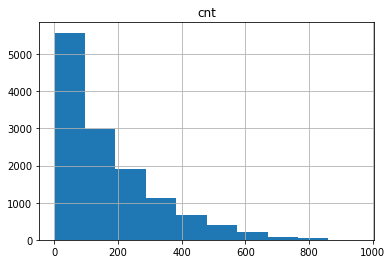

In [9]:
train.hist('cnt')

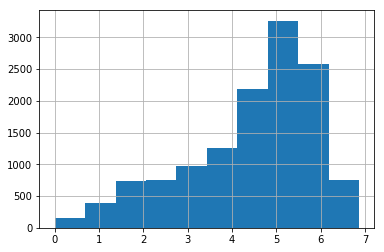

In [10]:
np.log(train.cnt).hist()

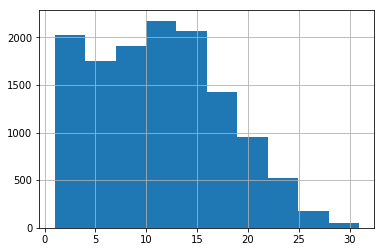

In [11]:
np.sqrt(train.cnt).hist()

It looks like a better distribution after taking the square root. I will be incorporating it in my model.

Since, the target variable is 'cnt' and not sqrt('cnt'), before looking at the predictions, we need to convert them back to orgnal values of 'cnt' by squaring the predictions.

In [12]:
train['cnt'] = np.sqrt(train.cnt)

In [13]:
train.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,4.000000
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,6.324555
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,5.656854
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,3.605551
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.000000


It looks like a better distribution after taking square root. I will be incorporating it in my model.
Since, the target variable is 'cnt' and not sqrt(cnt), before using the predictions, we need to convert them back to orignal values by squaring.

## Binning

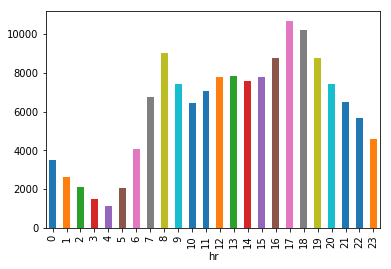

In [14]:
train.groupby('hr')['cnt'].sum().plot.bar()

In [15]:
# depending on the barchart, dividing dataset into 5 categories

train['hr_bins'] = pd.cut(train.hr, [-1, 6, 9, 15, 20, 24], labels = ['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])
train['hr_bins'][:5]

0    Late_Night
1    Late_Night
2    Late_Night
3    Late_Night
4    Late_Night
Name: hr_bins, dtype: category
Categories (5, object): [Late_Night < Office_Going < Mid_Day < Office_Returning < Night]

In [16]:
train['hr_bins'].value_counts()

Late_Night          3744
Mid_Day             3280
Office_Returning    2734
Office_Going        1639
Night               1638
Name: hr_bins, dtype: int64

We have binned accotding to the hourly distribution of count.

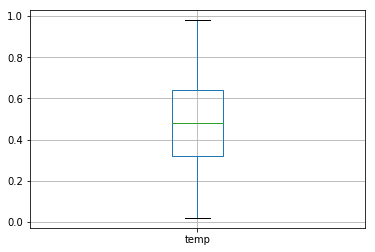

In [17]:
train.boxplot(column = 'temp')

In [18]:
train['temp_bins'] = pd.cut(train.temp, [0, 0.3, 0.7, 1], labels = ['Low', 'Average', 'high'])
train['temp_bins'][:5]

0    Low
1    Low
2    Low
3    Low
4    Low
Name: temp_bins, dtype: category
Categories (3, object): [Low < Average < high]

In [19]:
train['temp_bins'].value_counts()

Average    8447
Low        2858
high       1730
Name: temp_bins, dtype: int64

Binning:
    1. Business Logic - if you want to target customers according to their age group
    2. Based on the trend seen in Univariate Analysis
    3. Based on relationship with target variable

# Feature/ Variable Creation

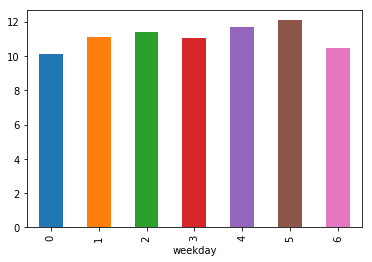

In [20]:
train.groupby('weekday').median().cnt.plot.bar()

In [21]:
train['weekend'] = ((train.holiday == 0) & (train.workingday == 0)).astype(int)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb_temp = LabelEncoder()

train['temp_bins'] = lb_temp.fit_transform(train.temp_bins)

In [24]:
lb_hr = LabelEncoder()

train['hr_bins'] = lb_hr.fit_transform(train.hr_bins)

In [25]:
df = pd.cut(train.atemp, [0, 0.3, 0.7, 1], labels = ['atemp_low', 'atemp_avg', 'atemp_high'])
dummy = pd.get_dummies(df)
dummy[:5]

,atemp_low,atemp_avg,atemp_high
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
train = pd.concat([train, dummy], axis = 1)

In [27]:
train[:5]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,hr_bins,temp_bins,weekend,atemp_low,atemp_avg,atemp_high
0,1,1,0,1,0,0,6,0,1,0.24,...,0.0,3,13,4.000000,0,1,1,1,0,0
1,2,1,0,1,1,0,6,0,1,0.22,...,0.0,8,32,6.324555,0,1,1,1,0,0
2,3,1,0,1,2,0,6,0,1,0.22,...,0.0,5,27,5.656854,0,1,1,1,0,0
3,4,1,0,1,3,0,6,0,1,0.24,...,0.0,3,10,3.605551,0,1,1,1,0,0
4,5,1,0,1,4,0,6,0,1,0.24,...,0.0,0,1,1.000000,0,1,1,1,0,0


In [28]:
train.corr()[:5]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,hr_bins,temp_bins,weekend,atemp_low,atemp_avg,atemp_high
instant,1.000000,0.111775,0.818586,0.156969,-0.007784,0.002583,0.001265,0.003200,-0.036729,0.164484,...,-0.029817,0.175793,0.272448,0.247821,-0.007691,-0.133060,-0.004214,-0.223279,0.210888,-0.013554
season,0.111775,1.000000,-0.398551,0.860652,-0.007900,-0.011476,-0.000899,0.010608,-0.013896,0.396799,...,-0.136074,0.105644,0.086086,0.117360,-0.007311,-0.032424,-0.006751,-0.366472,0.256510,0.139058
yr,0.818586,-0.398551,1.000000,-0.436539,-0.004738,-0.002220,-0.006967,-0.000151,-0.025445,-0.048912,...,0.054950,0.118124,0.213415,0.175967,-0.004404,-0.084537,0.000955,0.000525,0.038120,-0.069418
mnth,0.156969,0.860652,-0.436539,1.000000,-0.007193,0.006310,0.013697,0.005484,-0.014035,0.339578,...,-0.142520,0.072819,0.059485,0.085287,-0.006658,-0.068045,-0.007899,-0.352204,0.268472,0.094084
hr,-0.007784,-0.007900,-0.004738,-0.007193,1.000000,0.000445,-0.003644,0.002049,-0.026391,0.141782,...,0.137885,0.292431,0.381329,0.498872,0.663557,0.077456,-0.002262,-0.096618,0.034713,0.096692


In [29]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)][:5]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,hr_bins,temp_bins,weekend,atemp_low,atemp_avg,atemp_high
instant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,NaN,NaN,NaN,0.860652,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,NaN,0.860652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
train = train.drop(['temp'], axis = 1)

In [31]:
train = train[['season', 'weekend', 'yr', 'weathersit', 'temp_bins', 'hum', 'windspeed', 'atemp', 'hr_bins', 'cnt']]

In [32]:
X = train.drop('cnt', axis = 1)
y = train.cnt

In [33]:
test['temp_bins'] = pd.cut(test.temp, [0, 0.3, 0.7, 1], labels=['Low', 'Average', 'High'])

test['hr_bins'] = pd.cut(test.hr, [-1, 6, 9, 15, 20, 24], labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 
                                                                  'Night'])

test['temp_bins'] = lb_temp.fit_transform(test.temp_bins)
test['hr_bins'] = lb_hr.fit_transform(test.hr_bins)

df = pd.cut(test.atemp, [0, 0.3, 0.7, 1], labels=['atemp_low', 'atemp_avg', 'atemp_high'])
dummy = pd.get_dummies(df)
test = pd.concat([test, dummy], axis=1)

test['weekend'] = ((test.holiday == 0) & (test.workingday == 0)).astype(int)

test = test[['season', 'weekend', 'yr', 'weathersit', 'temp_bins', 'hum', 'windspeed', 'atemp', 'hr_bins', 'cnt']]

In [34]:
X_test = test

In [35]:
X_test = test.drop('cnt', axis = 1)
print (test.cnt[:5])

0     71
1    226
2    520
3    283
4    116
Name: cnt, dtype: int64


In [36]:
X_test.head()

,season,weekend,yr,weathersit,temp_bins,hum,windspeed,atemp,hr_bins
0,1,0,1,2,2,0.96,0.1343,0.2879,0
1,1,0,1,2,2,0.93,0.1045,0.2879,3
2,1,0,1,2,2,1.00,0.0000,0.3030,3
3,1,0,1,2,2,1.00,0.0000,0.3030,3
4,1,0,1,1,0,0.71,0.2836,0.3182,1


In [37]:
train.head()

,season,weekend,yr,weathersit,temp_bins,hum,windspeed,atemp,hr_bins,cnt
0,1,1,0,1,1,0.81,0.0,0.2879,0,4.000000
1,1,1,0,1,1,0.80,0.0,0.2727,0,6.324555
2,1,1,0,1,1,0.80,0.0,0.2727,0,5.656854
3,1,1,0,1,1,0.75,0.0,0.2879,0,3.605551
4,1,1,0,1,1,0.75,0.0,0.2879,0,1.000000
